In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
import nbimporter
import functions as F

In [50]:
root = '/home/raul/Documents/ROBOTS/evaluator-push-to-see/'
# root = '/home/raul/Documents/ROBOTS/push-to-see/logs/2021-09-07.16:39:18/'

file_name = 'training_9_1_k_iter.csv'
# file_name = 'test_non_agnostic_logs2021-09-07.16:39:18.txt'

df = pd.read_csv(root + file_name)
df = df.fillna(0)

df = df.astype({'iteration': 'int32', 'session': 'int32', 'obj_found': 'int32', 'obj_init': 'int32', 'run': 'int32'})

df.head()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
0,0,1,1,5,2,0.000000,0.029686,0.000000,0.000000
1,1,2,1,5,4,0.535066,0.564752,30.647367,29.556135
2,2,3,1,5,4,0.006566,0.571318,2.226544,1.805633
3,3,4,1,5,4,0.006019,0.577337,2.199116,1.657603
4,4,5,1,5,3,-0.255444,0.321893,-4.318513,2.745029


In [41]:
df.tail()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
9123,9123,12,890,2,1,0.017791,0.336230,0.172091,0.005311
9124,9124,13,890,2,1,0.007960,0.344190,0.150515,0.007075
9125,9125,14,890,2,1,-0.001074,0.343116,0.128352,0.011119
9126,9126,0,890,2,2,0.472636,0.815753,22.456054,21.710148
9127,9127,0,891,2,2,0.000000,0.778502,0.000000,0.000000


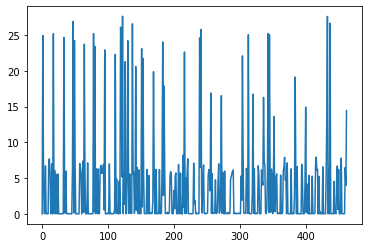

In [5]:
plt.plot(df['iteration'], df['loss'])

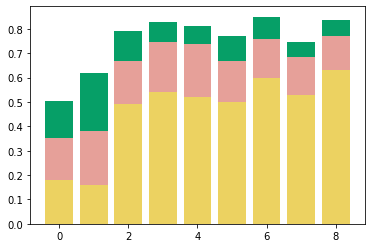

In [95]:
THRS = [15, 10, 5]
INTERVAL = 100

# temp = F.success_rate_on_run_intervals(df, THR, INTERVALS)
# temp['run_interval']

dfs = []

df['run_interval'] = df['run'] // INTERVAL

labels = pd.unique(df['run_interval'])

for t in THRS: 
    dfs.append(F.success_rate_on_run_intervals(df, t, INTERVAL))

fig, ax = plt.subplots()

for temp in dfs:
    ax.bar(pd.unique(df['run_interval']), temp['success_rate'], color=np.random.rand(3,))

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

plt.show()

In [ ]:
F.success_rate(df)
# F.avg_successful_pushes(df)
# F.sum_mask_rewards(df)

In [ ]:
df[df['run'] == runs[run_index]][['obj_init']]

In [ ]:
plt.plot(df[df['run'] == 13]['obj_found'])

In [ ]:
df[df['run'] == runs[run_index]]